In [111]:
# Disclaimer:
# 
# THIS IS NOT MEDICAL OR SCIENTIFIC INFORMATION. 
# I AM NOT A DOCTOR OR EPIDEMIOLOGIST.
# 
# The notebooks and code in this repository are meant 
# to explore and illustrate exponential growth, and the 
# effect of different variables (such as growth rates) on 
# that growth.  Both the information about the virus, as 
# well as the mathematics, or other info could be incorrect, 
# out of date, or otherwise wrong.  
# 
# Please refer to public health officials or a medical doctor
# for accurate information about the virus as it actually 
# pertains to reality.

In [112]:
# R0 values for seasonal flu (1.3), 
# and low and high R0 estimates for SARS-CoV-2 coronavirus
r = [1.3, 2, 2.5]

In [113]:
# mathy exponential growth formula 
#   x[t] = x[0] * (1 + r) ** t
# from:
#   https://en.wikipedia.org/wiki/Exponential_growth
def exp(base, t, rate):
    return base * (1 + rate) ** t

In [109]:
# compute numbers of infected
infected = [1 for _ in range(len(r))]
rows = []
for gen in range(20):
    rows.append(tuple(infected))
    for i in range(len(infected)):
        infected[i] = exp(1, gen, r[i])

In [114]:
# Convert to integer and format with commas
display_rows = [[f"{int(col):,}" for col in row] for row in rows]

In [115]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(display_rows, tablefmt='html')))

1,1,1
1,1,1
2,3,3
5,9,12
12,27,42
27,81,150
64,243,525
148,729,"1,838"
340,"2,187","6,433"
783,"6,561","22,518"
"1,801","19,683","78,815"


In [116]:
import matplotlib.pyplot as plt
import numpy as np

In [117]:
def do_plot(rows, ylabel="infected", yscale=None):
    plt.plot(rows)
    plt.xlabel("generation")
    plt.ylabel(ylabel)
    line_labels = [f"R0 = {rvalue}" for rvalue in r]
    plt.legend(line_labels)
    if yscale:
        plt.yscale(yscale)
    plt.show()

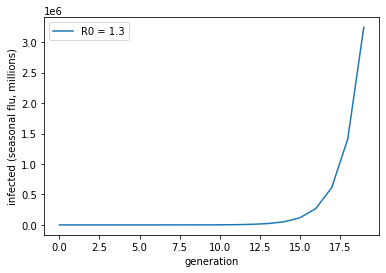

In [118]:
# show growth of seasonal flu alone
rows_just_flu = [row[0] for row in rows]
do_plot(rows_just_flu, ylabel="infected (seasonal flu, millions)")

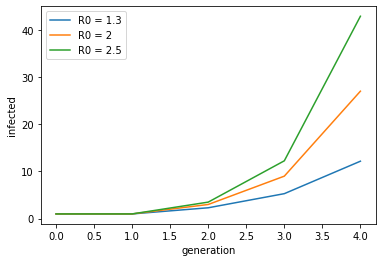

In [119]:
# plot first five generations
do_plot(rows[:5])

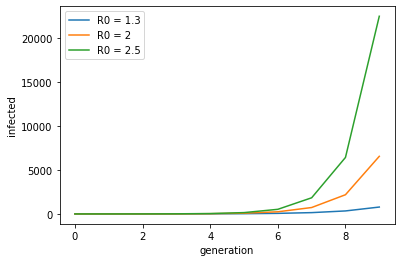

In [120]:
# plot first 10 generations
do_plot(rows[:10])

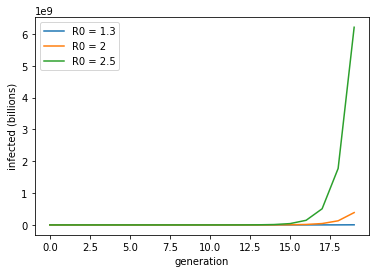

In [121]:
# plot all 20 generations
do_plot(rows, ylabel="infected (billions)")

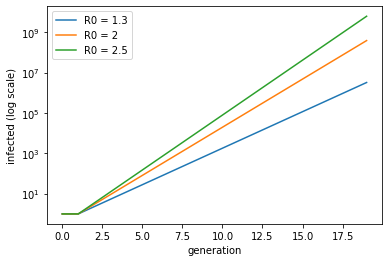

In [122]:
# plot all 20 generations on a log scale
do_plot(rows, ylabel="infected (log scale)", yscale="log")